In [1]:
import numpy as np
import matplotlib as plt
from sympy.physics.vector import dynamicsymbols
from sympy import symbols, cos, sin, diff, sqrt, init_printing, latex, Symbol, Eq, solve, lambdify

latexReplaceRules = {
    r'{\left(t \right)}':r' ',
    r'\frac{d}{d t}':r'\dot',
    r'\frac{d^{2}}{d t^{2}}':r'\ddot',
}
def latexNew(expr,**kwargs):
    retStr = latex(expr,**kwargs)
    for _,__ in latexReplaceRules.items():
        retStr = retStr.replace(_,__)
    return retStr
init_printing(latex_printer=latexNew)

In [2]:
#can do constants w symbols. w variables, do dynamic symbols

#constants 
G, M, omega, me, ma, f, mu, a, tau = symbols(r"G, M_s, \Omega, m_e, m_a, f, \mu, a, \tau", real=True)

t=Symbol('t')

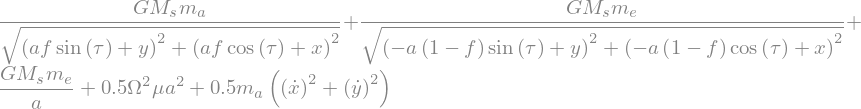

In [3]:
#degrees of freedom

x, y = dynamicsymbols("x, y", real=True) #add r if need to add slash
x_dot=x.diff()
y_dot=y.diff()

L= 0.5*ma*(x_dot**2+y_dot**2) + 0.5*mu*a**2 *omega**2 + G *M*me/a + G*M*ma/sqrt((x+(f*a*cos(omega*t)))**2+(y+f*a*sin(omega*t))**2)+ G*M*me/sqrt((x-((1-f)*a*cos(omega*t)))**2+(y-(1-f)*a*sin(omega*t))**2)

L=L.subs(omega*t, tau) #this is the nondimensionalization step w/ tau=t*omega 
L

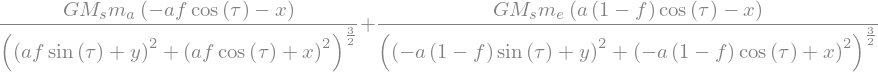

In [4]:
x_derivative=L.diff(x)

x_derivative

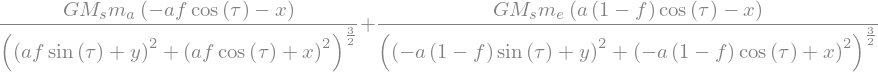

In [5]:
#RHS of Euler-Lagrange Equation for x 

x_derivative=L.diff(x)

x_derivative

In [6]:
#LHS of Euler-Lagrange Equation for x

x_dot_derivative=L.diff(x_dot)

x_dot_second_derivative= x_dot_derivative.diff(t) #maybe ask later

x_dot_second_derivative

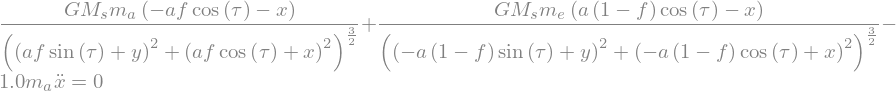

In [7]:
#Euler-Lagrange Equation for x 

ELx=Eq(x_derivative- x_dot_second_derivative,0)

ELx

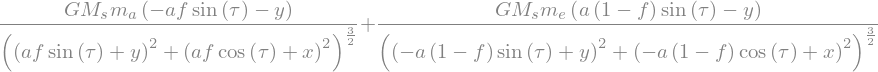

In [8]:
#RHS of y

y_derivative=L.diff(y)

y_derivative

In [9]:
#LHS of Euler-Lagrange Equation for y

y_dot_derivative=L.diff(y_dot)

y_dot_second_derivative= y_dot_derivative.diff(t) #maybe ask later

y_dot_second_derivative

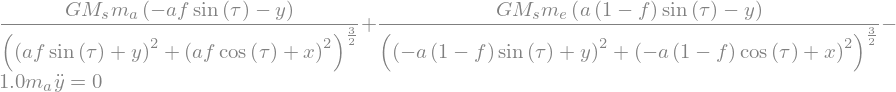

In [10]:
#Euler-Lagrange Equation for y

ELy=Eq(y_derivative- y_dot_second_derivative,0)

ELy

In [11]:
#input x,y, z, w, output-x_dot=z and y_dot=w

#using solve ivp 

#x** =f()   y**=g()

#solve(ELy, y_doubledot)



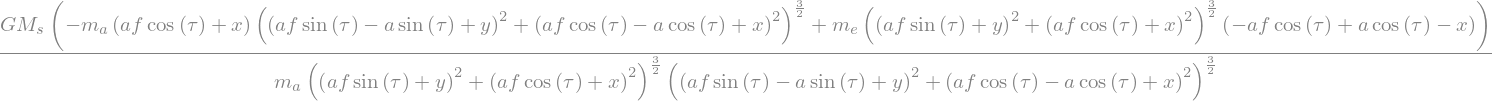

In [12]:
#Isolating x double dot

x_doubledot= solve(ELx, x_dot.diff(t))[0] 

x_doubledot

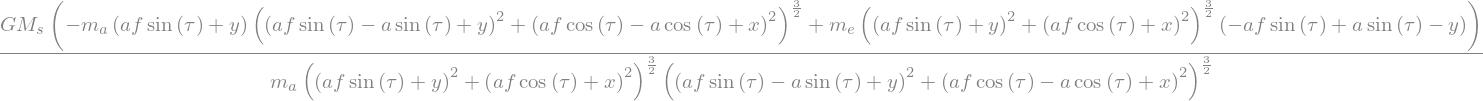

In [13]:
#Isolating y double dot

y_doubledot= solve(ELy, y_dot.diff(t))[0] #[0] to turn to not list, since gives list of solutions, but there's only 1 solution

y_doubledot

In [ ]:
# #lambdify, give eq in terms of variables, gives its inputs, then lets you input the inputs in the expression. So turn symbolic math into python function 

fy = lambdify([x, y, a, f, tau, ma, M, me, mu], y_doubledot, 'numpy')

<function _lambdifygenerated(_Dummy_77, _Dummy_76, a, f, Dummy_78, m_a, M_s, m_e, Dummy_79)>

In [ ]:
#lambdify, give eq in terms of variables, gives its inputs, then lets you input the inputs in the expression. So turn symbolic math into python function 

gx = lambdify((x, y, a, f, tau, ma, M, me, mu), x_doubledot, 'numpy') #can't print, is function

SyntaxError: invalid syntax (<lambdifygenerated-2>, line 1)